<a href="https://colab.research.google.com/github/Toto17515/Data_viz/blob/main/Visualization_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem

จากข้อมูลต่อสองตารางนี้ 
https://drive.google.com/file/d/1nu5kbf998xuMxll6eAJRVHEDbdo3v63D/view?usp=sharing  (ผู้ติดเชื้อ covid-19 กับ จำนวนผู้เดินทางใน)

ข้อสอบแบ่งเป็น 2 ส่วน 
1. Colab Notebook นี้ ให้สร้างกราฟเพื่อตามโจทย์ที่กำหนด
2. ใช้ Google Data Studio สร้าง Dashboard แสดงข้อมูลสำคัญ (ข้อมูลที่นักศึกษาเห็นว่าสำคัญและน่าสนใจที่จะนำมาแสดง) และอัดวิดีโออธิบาย Dashboard นั้น แล้วอัพโหลดวิดีโอลง youtube ในรูปแบบ unlist

*commit colab ข้อ 1 เป็น ชื่อ link youtube ที่อัพโหลดในข้อ 2 แล้วไปเพิ่มข้อมูลเวลา submit ใน google sheet นี้ https://docs.google.com/spreadsheets/d/1dxHoPftXEmK1ZRs2OAjAA7DbS-YdZBXzkXz_qiZteUg/edit?usp=sharing

**ส่วนที่ 1**

สร้างกราฟเพื่อแสดงข้อมูลต่อไปนี้ (ข้อละอย่างน้อย 1 กราฟ)
1. เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน
2. เปรียบเทียบวิธีการเดินทางของคนเป็นรายเดือนเทียบกับจำนวนผู้ป่วยในเดือนนั้นๆ
3. เปรียบเทียบ จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของจังหวัด top 10 ของ 6 เดือนล่าสุด
4. เปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค (5 ภูมิภาค (การท่องเที่ยว)) ตามข้อมูลใน https://th.wikipedia.org/wiki/ภูมิภาคของประเทศไทย 
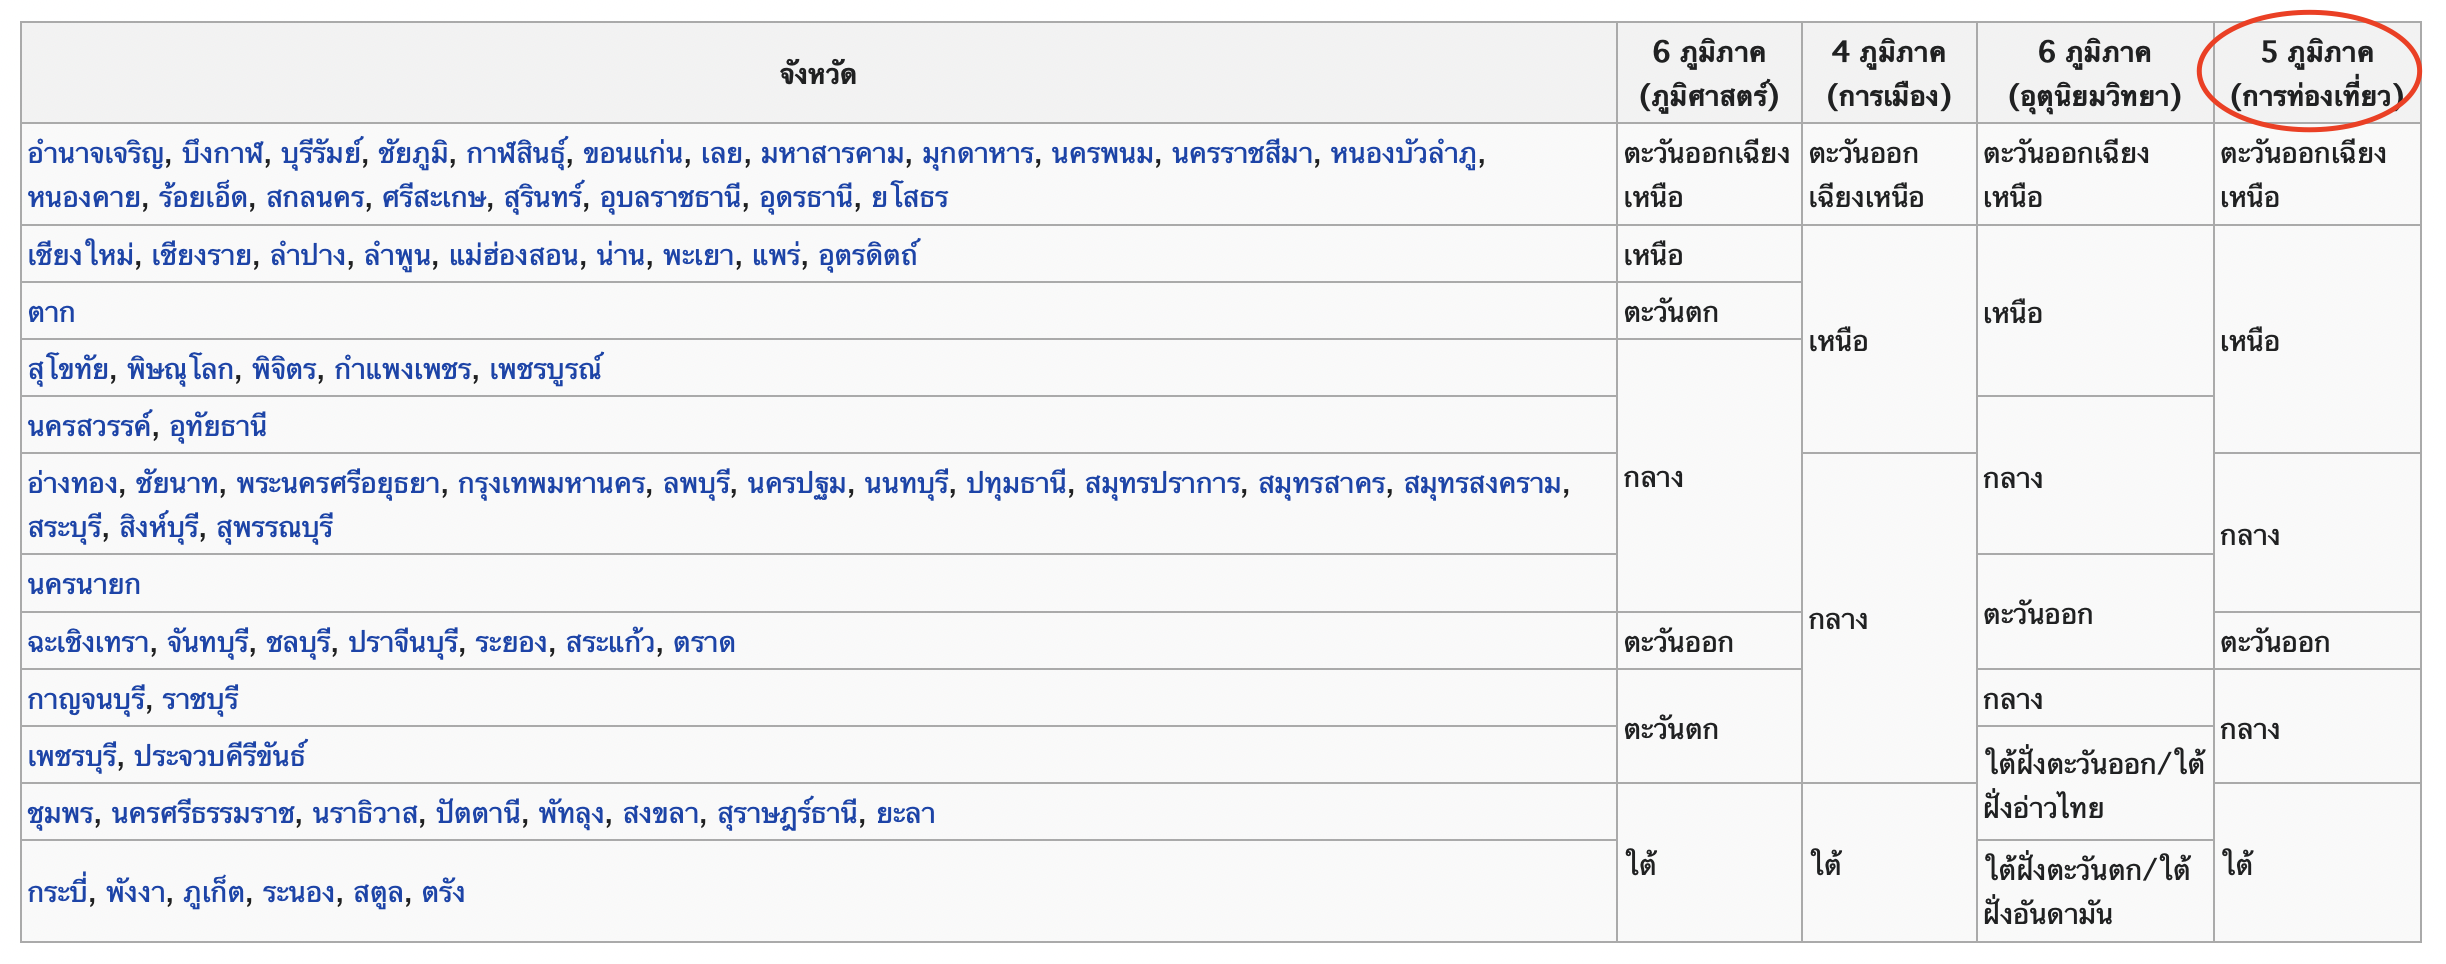



#Import

##Import Library

In [203]:
import pandas as pd
import numpy as np
from datetime import  datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

แสดงกราฟภาษาไทย

In [204]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

##Mount Google Drive

In [205]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Import Data

###Passenger Data

#### ปี 2562

ข้อมูลการเดินทางของผู้โดยสารปี พ.ศ. 2562 

แหล่งที่มา: https://drive.google.com/file/d/1nu5kbf998xuMxll6eAJRVHEDbdo3v63D/view?usp=sharing

In [206]:
Data2562 = pd.read_excel('/content/gdrive/MyDrive/Data_Viz/Final/passenger-covid19.xlsx',sheet_name='Data62')
Data2562.head()

,ขนคน/ขนสินค้า,โหมดการเดินทาง,รูปแบบการเดินทาง,สาธารณะ/ส่วนบุคคล,หน่วยงาน,ยานพาหนะ/ท่า,ม.ค. 2562,ก.พ. 2562,มี.ค. 2562,เม.ย. 2562,พ.ค. 2562,มิ.ย. 2562,ก.ค. 2562,ส.ค. 2562,ก.ย. 2562,ต.ค. 2562,พ.ย. 2562,ธ.ค. 2562
0,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,บขส.,รถ ขบส. และ รถร่วม,5236331,4628878.0,5234387.0,5137450.0,4885221.0,4572261.0,4772689.0,4701554.0,4482707.0,4774815.0,4559610.0,4840673.0
1,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,ขบ.,รถ Taxi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,ขบ.,รถหมวด 3,2550864,2334128.0,2599144.0,2602024.0,2543424.0,2435944.0,2526104.0,2492728.0,2420736.0,2499408.0,2450888.0,2516032.0
3,ขนคน (คัน),ทางบก,การเดินทางระหว่างจังหวัด,ส่วนบุคคล,ทล.,รถยนต์ (10 จุดสำรวจ),28907234,26699682.0,30210655.0,28542444.0,29407838.0,27789633.0,28811411.0,29552867.0,27950945.0,29335664.0,28325020.0,29615013.0
4,ขนคน (คัน),ทางบก,การเดินทางระหว่างจังหวัด,ส่วนบุคคล,กทพ.,รถยนต์ (ทางด่วน),56404661,51536713.0,57376504.0,46838468.0,45769555.0,47344042.0,46027953.0,47566521.0,44765838.0,47236151.0,46996660.0,47294111.0


ข้อมูลการเดินทางของผู้โดยสารปี พ.ศ. 2562 เพิ่มเติ่ม 

แหล่งที่มา: https://drive.google.com/file/d/1nu5kbf998xuMxll6eAJRVHEDbdo3v63D/view?usp=sharing

In [207]:
MoreData2562 = pd.read_excel('/content/gdrive/MyDrive/Data_Viz/Final/passenger-covid19.xlsx',sheet_name='2562', skiprows =1)
MoreData2562.head()

,Unnamed: 0,ม.ค. 2562,ก.พ. 2562,มี.ค. 2562,เม.ย. 2562,พ.ค. 2562,มิ.ย. 2562,ก.ค. 2562,ส.ค. 2562,ก.ย. 2562,ต.ค. 2562,พ.ย. 2562,ธ.ค. 2562
0,ทางถนน (คน),69405563,64505513,68463965,60720736,61480612,62832725,62930925,62548490,62848974,62194941,62158959,61473368
1,ทางราง (คน),35935961,32769271,37078944,32790080,34060110,35109745,36303758,38537319,37368389,38021850,39026128,37241766
2,ทางน้ำ (คน),8074883,7957106,8133812,9391642,7224226,6839248,7109803,8196449,6859556,7920010,8030502,8779130
3,ทางอากาศ* (คน),3257864,3002783,3174634,3032381,2848154,2680782,2851182,2894473,2537753,3036999,2926859,3093699
4,รวมประชาชนเดินทาง (คน),116674271,108234673,116851355,105934839,105613102,107462500,109195668,112176731,109614672,111173800,112142448,110587963


####ปี 2563 - 2564

ข้อมูลการเดินทางของผู้โดยสารปี พ.ศ. 2563 ถึง พ.ศ. 2564 

แหล่งที่มา: https://drive.google.com/file/d/1nu5kbf998xuMxll6eAJRVHEDbdo3v63D/view?usp=sharing

In [208]:
Data2563to2564 = pd.read_excel('/content/gdrive/MyDrive/Data_Viz/Final/passenger-covid19.xlsx',sheet_name='Data63-64')
Data2563to2564.head()

,ขนคน/ขนสินค้า,โหมดการเดินทาง,รูปแบบการเดินทาง,สาธารณะ/ส่วนบุคคล,หน่วยงาน,ยานพาหนะ/ท่า,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,บขส.,รถ ขบส. และ รถร่วม,233330,252899.0,225731.0,216919.0,234611.0,153605.0,142318.0,138700.0,139202.0,155553.0,150419.0,156634.0,143982.0,138215.0,136102.0,143219.0,155363.0,154020.0,162852.0,151027.0,143574.0,142722.0,145672.0,161263.0,154822.0,166247.0,153945.0,144313.0,141870.0,142709.0,160689.0,155232.0,163819.0,151378.0,...,48763.0,62129.0,52073.0,58507.0,52521.0,49540.0,48797.0,52669.0,73143.0,66697.0,68272.0,58026.0,52905.0,46689.0,54445.0,70366.0,60124.0,69317.0,60306.0,58385.0,58906.0,71885.0,101077.0,101477.0,70140.0,60013.0,54408.0,59808.0,64993.0,63546.0,62501.0,61356.0,51525.0,41814.0,33459.0,31489.0,32425.0,28844.0,27472.0,27701.0
1,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,ขบ.,รถ Taxi,การโดยสารด้วยรถแท็กซี่ เป็นการเคลื่อนย้ายคนแบบ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ขนคน (คน),ทางบก,การเดินทางระหว่างจังหวัด,สาธารณะ,ขบ.,รถหมวด 3,มีข้อมูลย้อนหลังเป็นรายเดือน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13457.0,13978.0,13261.0,15707.0,12494.0,14209.0,11429.0,12634.0,13611.0,12840.0,11056.0,14920.0,10974.0,12268.0,14722.0,13579.0,13314.0,12663.0,12587.0,12537.0,16531.0,15289.0,18479.0,16529.0,15812.0,12359.0,12825.0,9588.0,10621.0,12862.0,9496.0,12228.0,9984.0,8493.0,7292.0,6232.0,8916.0,8602.0,6163.0,7849.0
3,ขนคน (คัน),ทางบก,การเดินทางระหว่างจังหวัด,ส่วนบุคคล,ทล.,รถยนต์เฉพาะ 4 ล้อ (10 จุดสำรวจ),977347,987340.0,971727.0,1023019.0,1043024.0,945256.0,883892.0,893951.0,890530.0,970028.0,953924.0,960443.0,909881.0,858725.0,871378.0,893902.0,970326.0,1009182.0,991817.0,925085.0,898084.0,909900.0,928864.0,990371.0,1035608.0,1013639.0,942858.0,896452.0,889830.0,917270.0,995977.0,1011706.0,1024280.0,947972.0,...,866114.0,950213.0,965207.0,972756.0,915217.0,850984.0,853143.0,866006.0,950009.0,965784.0,970345.0,906192.0,855397.0,864919.0,871853.0,973011.0,1017964.0,985473.0,941929.0,887329.0,908125.0,913633.0,1024308.0,1045432.0,895712.0,802220.0,724818.0,723697.0,795917.0,800655.0,797260.0,766618.0,792586.0,758903.0,770418.0,768001.0,840223.0,846120.0,800769.0,794328.0
4,ขนคน (

ข้อมูลการเดินทางของผู้โดยสารปี พ.ศ. 2563 ถึง พ.ศ. 2564 เพิ่มเติม 

แหล่งที่มา: https://drive.google.com/file/d/1nu5kbf998xuMxll6eAJRVHEDbdo3v63D/view?usp=sharing

In [209]:
MoreData2563to2564 = pd.read_excel('/content/gdrive/MyDrive/Data_Viz/Final/passenger-covid19.xlsx',sheet_name='2563-2564 รวมในประเทศ',skiprows=1)
MoreData2563to2564.head()

,Unnamed: 0,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-11 00:00:00,2020-01-12 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,...,2021-03-18 00:00:00,2021-03-19 00:00:00,2021-03-20 00:00:00,2021-03-21 00:00:00,2021-03-22 00:00:00,2021-03-23 00:00:00,2021-03-24 00:00:00,2021-03-25 00:00:00,2021-03-26 00:00:00,2021-03-27 00:00:00,2021-03-28 00:00:00,2021-03-29 00:00:00,2021-03-30 00:00:00,2021-03-31 00:00:00,2021-04-01 00:00:00,2021-04-02 00:00:00,2021-04-03 00:00:00,2021-04-04 00:00:00,2021-04-05 00:00:00,2021-04-06 00:00:00,2021-04-07 00:00:00,2021-04-08 00:00:00,2021-04-09 00:00:00,2021-04-10 00:00:00,2021-04-11 00:00:00,2021-04-12 00:00:00,2021-04-13 00:00:00,2021-04-14 00:00:00,2021-04-15 00:00:00,2021-04-16 00:00:00,2021-04-17 00:00:00,2021-04-18 00:00:00,2021-04-19 00:00:00,2021-04-20 00:00:00,2021-04-21 00:00:00,2021-04-22 00:00:00,2021-04-23 00:00:00,2021-04-24 00:00:00,2021-04-25 00:00:00,2021-04-26 00:00:00
0,ทางถนน (คน),1483255,1705026,1752572,1576146,1565134,1746239,1730243,1721777,1698594,1727356,1522765,1511236,1683606,1691301,1727613,1676901,1732040,1556750,1511356,1718946,1710079,1678182,1685422,1658692,1523835,1498975,1696898,1679988,1668462,1640721,1704546,1400174,1483074,1706497,1731697,1727513,1662866,1746742,1505635,...,997062,1017447,849673,787616,937505,969454,958065,981683,1011976,877911,794001,974571,965117,967022,987469,1006485,868194,789312,965421,753176,908431,936938,929038,719618,555680,578184,424539,454352,479063,596596,540688,507339,695769,665925,648848,631892,635830,516751,425707,580580
1,ทางราง (คน),885353,1269207,1366412,1027281,915425,1479971,1496915,1496873,1525899,1630428,1192917,988051,1479502,1491002,1502596,1507477,1599647,1169227,983700,1495196,1497279,1488097,1497174,1527329,1116084,938763,1420125,1457240,1440515,1464619,1597290,1097787,940562,1452349,1437693,1463069,1465400,1589959,1036116,...,984873,1033094,690769,544737,961659,986118,994193,1007277,1083825,730040,583999,1002307,1008957,1039196,1037660,1109747,726174,537800,986006,586488,932517,830224,792450,430863,303809,396526,235614,227986,245450,421863,303925,260010,520387,488979,475030,467490,474554,289943,223384,418835
2,ทางน้ำ (คน),272578,291990,301260,271171,254176,281785,275127,253550,263139,280283,243767,246025,276490,276916,253897,252473,281743,251052,227983,293441,278167,267105,266393,281291,257999,246371,269399,270801,253640,257520,264406,220866,231707,264747,259426,262889,257261,268799,234187,...,85762,126155,81959,86020,90290,109277,78491,88408,88934,85300,79325,107145,95217,91676,84888,81193,115793,106230,100081,83620,116425,105530,118869,163296,169357,167760,182536,166326,150923,108396,103610,73357,77813,69035,66006,60186,54870,48885,42733,53591
3,ทางอากาศ* (คน),102678,104613,100575,100852,100784,98456,98722,96142,98749,101348,93156,99755,99229,98052,98970,103727,106000,103356,105954,105424,100735,101432,104623,103697,101563,103158,103498,98451,95555,95849,97556,90402,89533,88154,85779,88266,93860,99445,94944,...,51244,65243,57665,64944,59144,51341,53670,59380,67960,63406,72844,66721,56866,57980,70353,77529,76062,80447,73958,77376,74769,79717,75900,69100,59960,51998,47717,48945,49859,44204,43157,45917,29483,25390,18141,16139,15365,13702,16622,13585
4,รวมประชาชนเดินทาง (คน),2743864,3370836,3520819,2975450,2835519,3606451,3601007,3568342,3586381,3739415,3052605,28450

### Covid-19 Data

ข้อมูลรายงาน COVID-19 ประจำวัน ข้อมูลประจำประเทศไทย 

แหล่งที่มา:https://drive.google.com/file/d/1nu5kbf998xuMxll6eAJRVHEDbdo3v63D/view?usp=sharing

In [210]:
data_covid = pd.read_csv("/content/gdrive/MyDrive/Data_Viz/Final/covid19cases.csv")
data_covid.head()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


###Region Data

ข้อมูลภูมิภาคต่างๆที่แบ่งตามการท่องเที่ยว 

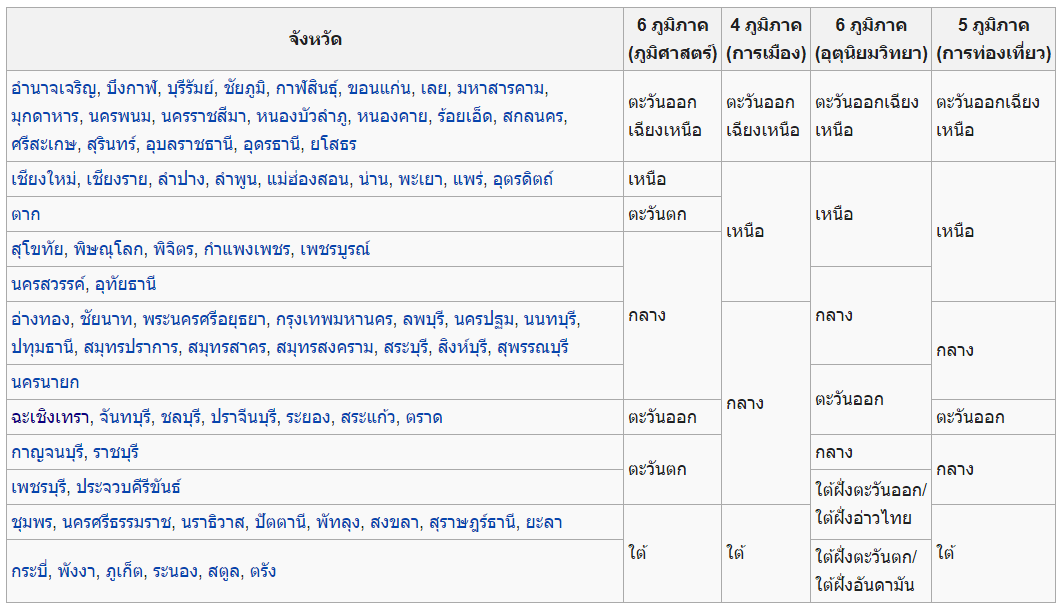

อ้างอิง: https://th.wikipedia.org/wiki/%E0%B8%A0%E0%B8%B9%E0%B8%A1%E0%B8%B4%E0%B8%A0%E0%B8%B2%E0%B8%84%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2https://th.wikipedia.org/wiki/%E0%B8%A0%E0%B8%B9%E0%B8%A1%E0%B8%B4%E0%B8%A0%E0%B8%B2%E0%B8%84%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2 


ทำการดึงข้อมูลจาก web เข้า excel ดังนี้
1.  เปิดไฟล์ excel ไปที่ data เลือก From Web
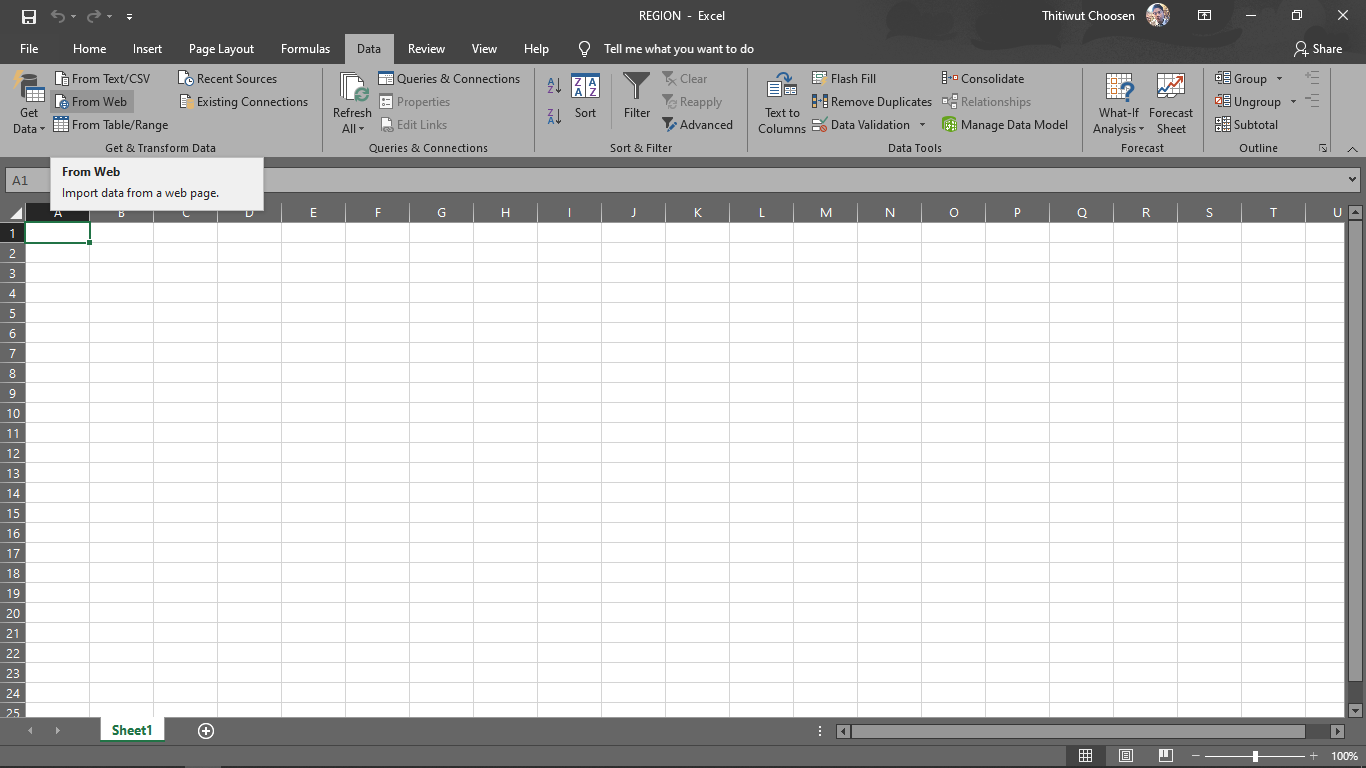

2. นำ url ของ web ที่ต้อวการดึงข้อมูลมาวาง แล้วกด OK
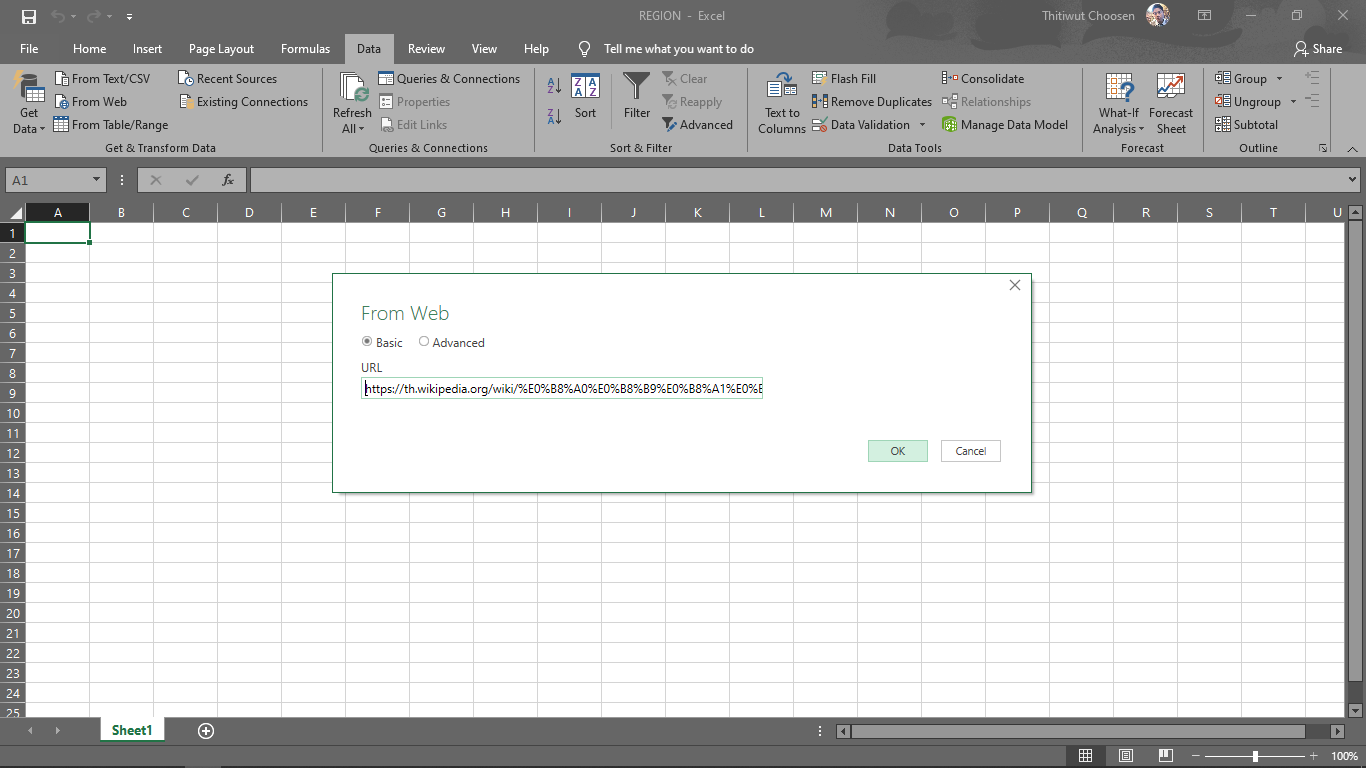

3. ทำการเลือกตารางข้อมูลที่ต้องการดึง
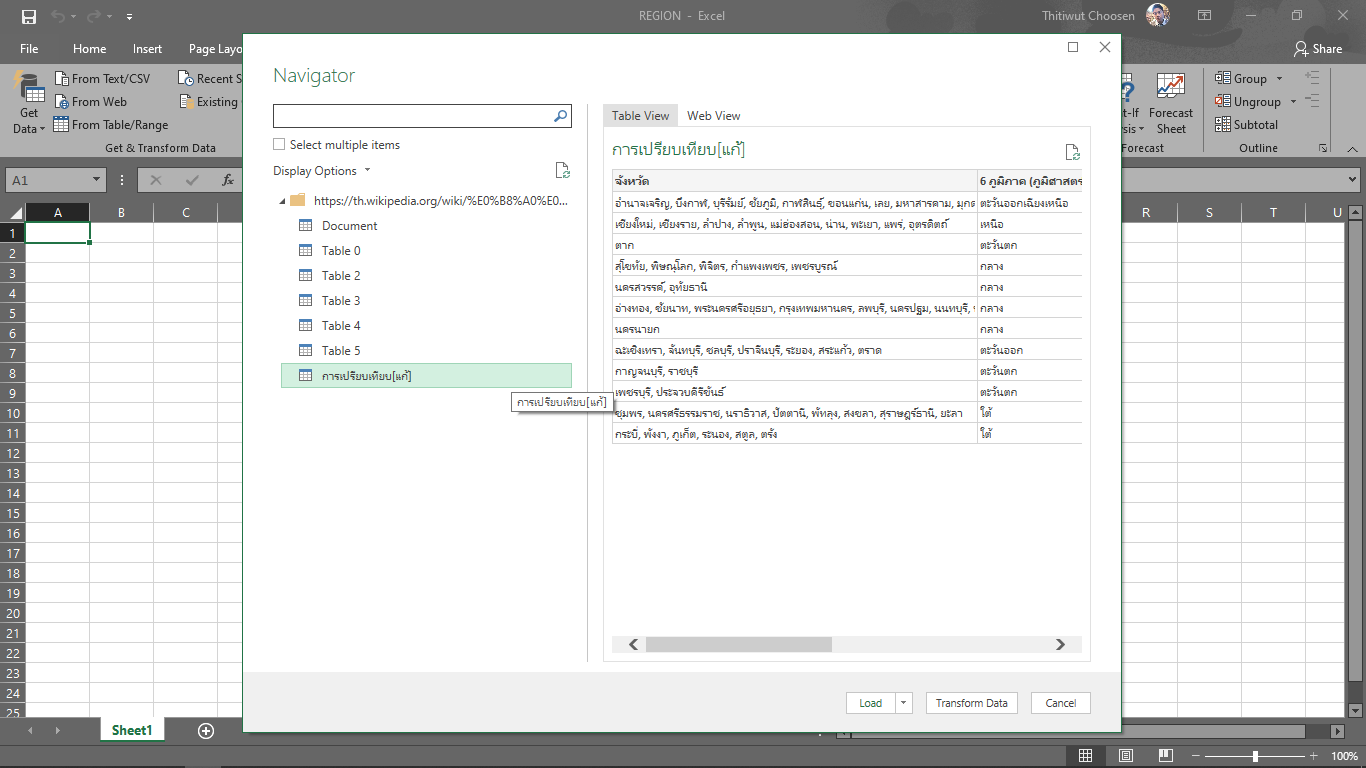

4. ทำการกด load ข้อมูลที่ต้องการ
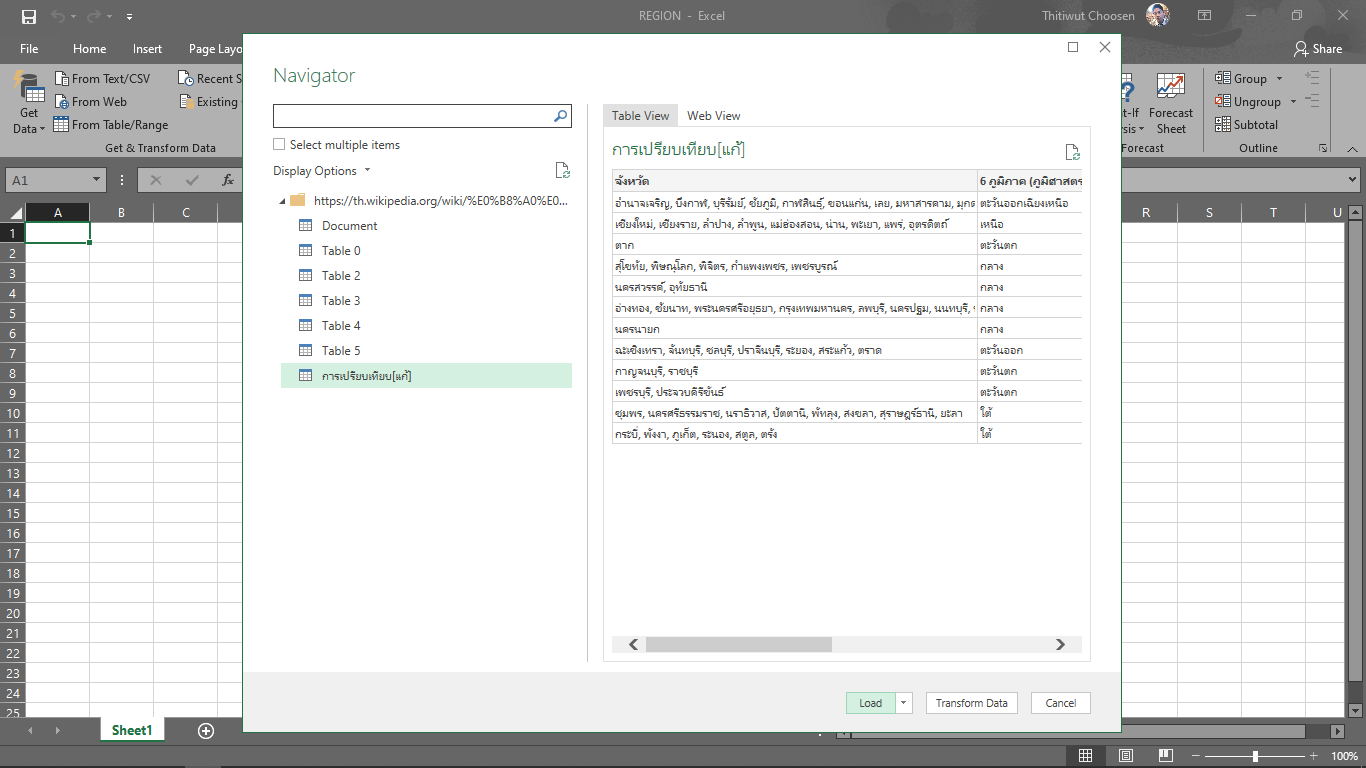

5. จะได้ข้อมูลดังภาพ และทำการบันทึกข้อมูลเป็นไฟล์ csv
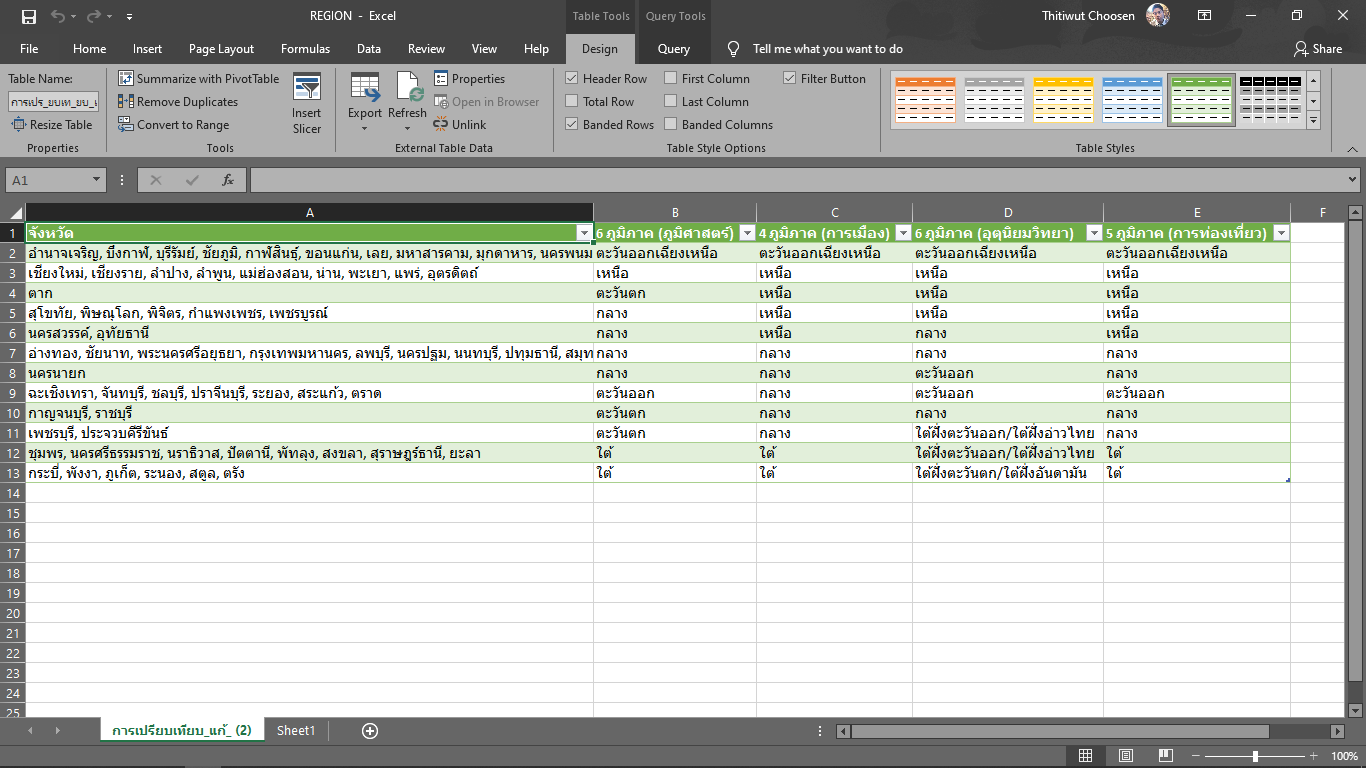

ข้อมูล: https://drive.google.com/file/d/1tn75kTQAuVOD9gKVUEVzVZO9d8Xt5PcX/view?usp=sharing

ดึงข้อมูลจาก drive แหล่งข้อมูล https://drive.google.com/file/d/1tn75kTQAuVOD9gKVUEVzVZO9d8Xt5PcX/view?usp=sharing

In [211]:
data_region= pd.read_csv("/content/gdrive/MyDrive/Data_Viz/Final/REGION.csv")
data_region.head()

,จังหวัด,6 ภูมิภาค (ภูมิศาสตร์),4 ภูมิภาค (การเมือง),6 ภูมิภาค (อุตุนิยมวิทยา),5 ภูมิภาค (การท่องเที่ยว)
0,"อำนาจเจริญ, บึงกาฬ, บุรีรัมย์, ชัยภูมิ, กาฬสิน...",ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ,ตะวันออกเฉียงเหนือ
1,"เชียงใหม่, เชียงราย, ลำปาง, ลำพูน, แม่ฮ่องสอน,...",เหนือ,เหนือ,เหนือ,เหนือ
2,ตาก,ตะวันตก,เหนือ,เหนือ,เหนือ
3,"สุโขทัย, พิษณุโลก, พิจิตร, กำแพงเพชร, เพชรบูรณ์",กลาง,เหนือ,เหนือ,เหนือ
4,"นครสวรรค์, อุทัยธานี",กลาง,เหนือ,กลาง,เหนือ


การดึงข้อมูลเช่นนี้จะทำให้ไม่เกิด humman error และใช้ได้กรณีข้อมูลมีจำนวนมาก



---



---



#Data Cleaning

##Passenger Data

พบว่า column ของ Data2562 และ MoreData2562 ข้อมูลเริ่ม data covid เริ่มจาก 12/1/2020 จึงไม่ได้ใช้ข้อมูล

###MoreData253to2564


####Select Data

เรียกดูข้อมูล

In [ ]:
MoreData2563to2564.head()

เลือกข้อมูลการเดินทางโดยรวมของประชาชน

In [ ]:
data_travel = MoreData2563to2564[MoreData2563to2564["Unnamed: 0"]=="รวมประชาชนเดินทาง (คน)"]
data_travel

ทำการลบ index ออก

In [ ]:
data_travel.set_index('Unnamed: 0', inplace=True) #กำหนด index เป็นคอลัมน์ 'Unnamed: 0'
data_travel = data_travel.rename_axis(None)       #เอาชื่อ index ออก
data_travel

ทำการเปลี่ยนแถวเป็นคอลัมน์

In [ ]:
data_total_travel = data_travel.transpose()
data_total_travel.head()

ทำการสร้างคอลัมน์เก็บค่า index ที่เป็นวันที่มาใส่คอลัมน์ชื่อ date

In [ ]:
data_total_travel['date'] = data_total_travel.index
data_total_travel.head()

ตั้งค่า Index ให้เป็นตัวเลข โดยเริ่มต้นที่ 0

In [ ]:
data_total_travel.reset_index(drop=True, inplace=True)
data_total_travel.head()

ทำการเปลี่ยนชื่อ column

In [ ]:
data_total_travel.rename(columns={"รวมประชาชนเดินทาง (คน)":"number_of_people"},inplace=True)
data_total_travel.head()

ทำการจัดคอลัมน์ให้ดูง่าย

In [ ]:
data_total_travel = data_total_travel[['date','number_of_people']]
data_total_travel.head()

####Missing Vlaue

In [ ]:
data_total_travel.isnull().sum()

พบว่าไม่มีข้อมูลสูญหาย

####Wrong Value

In [ ]:
data_total_travel.dtypes

> date

พบว่าข้อมูล date เป็นข้อมูลประเภท datetime ซึ่งจาก dataframe พบว่าเป็นลำดับข้อมูลเป็นข้อมูลประเภท datetime ดังนั้น ข้อมูล date จึงมีข้อมูลที่เป็นค่าผิดปกติ

> number_of_people

พบว่าข้อมูล number_of_people เป็นข้อมูลประเภท Numeric ซึ่งจาก dataframe พบว่าเป็นลำดับข้อมูลเป็นข้อมูลประเภท object ดังนั้น ข้อมูล number_of_people จึงมีข้อมูลที่เป็นค่าผิดปกติ

เรียกดูข้อมูล

In [ ]:
data_total_travel.head()

number_of_people พบว่าข้อมูลเป็นตัวเลข เกิดข้อสงสัยว่ามีการบันทึกข้อมูลเป็น string จึงเรียกดูชนิดของมูลมาหนึ่งแถว

In [ ]:
type(data_total_travel.iloc[0,1])

พบว่ามีชนิดข้อมูลเป็นตัวเลข จึงทำการเรียกดูทุกเเถวหาค่าผิดปกติ

In [ ]:
for each_row in data_total_travel.iterrows():
  if type(each_row[1]['number_of_people']) != type(0):
    print(each_row[1]['date'])

คำสั่ง print ไม่ทำงานแสดงว่าทุกแถวเป็นข้อมูล Numric ทำการตรวจสอบอีกครั้ง โดยนับค่าผิดปกติ

In [ ]:
n = 0
for each_row in data_total_travel.iterrows():
  if type(each_row[1]['number_of_people']) != type(0):
    n+=1
n

พบว่าผิดปกติของข้อมูลเป็น 0 ดังนั้นข้อมูลการเดินของประชาชน


In [ ]:
data_total_travel.head()

####Messy Format

เรียกดูข้อมูล

In [ ]:
data_total_travel.head()

พบว่าข้อมูลการเดินทางเป็นรายวัน แต่จากโจทย์ต้องการนำเสนอเ็นรายเดือน จึงทำการรวมจำนวนคนเดินทางจากรายวันเป็นรายเดือน

กำหนดวันที่การเดินทางเป็น index

In [ ]:
data_total_travel.set_index('date',inplace=True)
data_total_travel.head()

ทำการรวมข้อมูลรายวัน ด้วยการชี้ index

In [ ]:
data_total_travel_sum = data_total_travel.resample('1M').sum()
data_total_travel_sum.head()

ทำการสร้างคลัมน์มาเก็บวันที่จาก index ชื่อ date

In [ ]:
data_total_travel_sum['date'] = data_total_travel_sum.index
data_total_travel_sum.head()

ทำการกำหนดค่า index ให้เป็นตัวเลข โดยเริ่มต้นที่ 0

In [ ]:
data_total_travel_sum.reset_index(drop=True, inplace=True)
data_total_travel_sum = data_total_travel_sum.rename_axis(None)  
data_total_travel_sum.head()

ทำการจัดคอลัมน์ให้ดูง่ายขึ้น

In [ ]:
df_total_travel = data_total_travel_sum[['date','number_of_people']]
df_total_travel.head()

###Data2563to2564

ข้อมูลการเดินทางแต่ละแบบ

####Select Data

In [ ]:
Data2563to2564.head()

ทำลบคอลัมน์ที่ไม่ต้องการออก 

In [ ]:
Data2563to2564.drop(['ขนคน/ขนสินค้า', 'รูปแบบการเดินทาง', 'สาธารณะ/ส่วนบุคคล', 'หน่วยงาน'], axis=1, inplace=True)
Data2563to2564.head()

แบ่งข้อมูลเป็นสองกลุ่มคือ หมวดการเดินทาง และ ยานพาหะนะ

#####Travel Type

ทำการกำหนด index เป็น ยานพาหนะ/ท่า

In [ ]:
Data2563to2564_type = Data2563to2564
Data2563to2564_type.set_index('ยานพาหนะ/ท่า', inplace= True)
Data2563to2564_type = Data2563to2564_type.rename_axis(None) 
Data2563to2564_type.head()

ทำการเปลี่ยนแถวเป็นคอลัมน์

In [ ]:
Data2563to2564_type_T = Data2563to2564_type.T
Data2563to2564_type_T.head()

สร้างคอลัมน์มาเก็บค่า index เป็นวันที่ 

In [ ]:
Data2563to2564_type_T['date'] = Data2563to2564_type_T.index
Data2563to2564_type_T.head()

ลบแถวโหมดการเดินทาง

In [ ]:
Data2563to2564_type_T.drop(['โหมดการเดินทาง'], inplace=True)
Data2563to2564_type_T.head()

ทำการ set index เป็น 0

In [ ]:
Data2563to2564_type_T.reset_index(drop=True, inplace=True)
Data2563to2564_type_T.head()

#####Travel Mode

เรียกดูข้อมูล

In [ ]:
Data2563to2564.head()

ทำการกำหนด index เป็น โหมดการเดินทาง

In [ ]:
Data2563to2564_mode = Data2563to2564.set_index('โหมดการเดินทาง',)
Data2563to2564_mode = Data2563to2564_mode.rename_axis(None,)
Data2563to2564_mode.head()

ทำการเปลี่ยนแถวเป็นคอลัมน์

In [ ]:
Data2563to2564_mode_T = Data2563to2564_mode.T
Data2563to2564_mode_T.head()

สร้างคอลัมน์มาเก็บค่า index

In [ ]:
Data2563to2564_mode_T['date'] = Data2563to2564_mode_T.index
Data2563to2564_mode_T.head()

####Wrong Value

#####Travel Type

In [ ]:
Data2563to2564_type_T.dtypes

พบว่ามีข้อบ้างชุดที่เป็นตัวอักษรทำการแทนค่าด้วย `0.00`



In [ ]:
for i in range(Data2563to2564_type_T.shape[0]):
  for j in range(Data2563to2564_type_T.shape[1]):
    if type(Data2563to2564_type_T.iloc[i,j]) == type('T'):
      Data2563to2564_type_T.replace(to_replace = Data2563to2564_type_T.iloc[i,j], value = 0.00, inplace=True)
Data2563to2564_type_T.dtypes

#####Travel Mode

In [ ]:
Data2563to2564_mode_T.dtypes

พบว่ามีข้อบ้างชุดที่เป็นตัวอักษรทำการแทนค่าด้วย `0.00`

In [ ]:
for i in range(Data2563to2564_mode_T.shape[0]):
  for j in range(Data2563to2564_mode_T.shape[1]):
    if type(Data2563to2564_mode_T.iloc[i,j]) == type('T'):
      Data2563to2564_mode_T.replace(to_replace = Data2563to2564_mode_T.iloc[i,j], value = 0.00, inplace=True)
Data2563to2564_mode_T.dtypes

####Missing Value

#####Travel Type

หาค่าผิดปกติ

In [ ]:
Data2563to2564_type_T.isnull().sum()

พบว่า มีข้อมูลสูญหาย ทำการแทนค่าสูญหายด้วย 0

In [ ]:
Data2563to2564_type_T.fillna(0,inplace=True)

หาค่า missing


In [ ]:
Data2563to2564_type_T.isnull().sum()

#####Travel Mode

In [ ]:
Data2563to2564_mode_T.isnull().sum()

ทำการแทนข้อมูลด้วยค่าว่างด้วย 0

In [ ]:
Data2563to2564_mode_T.fillna(0,inplace=True)

หาค่า minsing value

In [ ]:
Data2563to2564_mode_T.isnull().sum()

####Messy Value

#####Travel Tpye

In [ ]:
Data2563to2564_type_T.head()

ทำการรวมวันเป็นรายเดือน

In [ ]:
Data2563to2564_type_T.set_index('date', inplace=True)
Data2563to2564_type_T = Data2563to2564_type_T.resample('1M').sum()
Data2563to2564_type_T['date'] = Data2563to2564_type_T.index
Data2563to2564_type_T.reset_index(drop=True, inplace=True)
Data2563to2564_type_T

ข้อมูลที่พรอ้มนำไปวิเคราะห์

In [ ]:
df_travel_type = Data2563to2564_type_T
df_travel_type.head()

#####Travel Mode

In [ ]:
Data2563to2564_mode_T.head()

ทำการรวมข้อมูลเป็นรายเดือน

In [ ]:
Data2563to2564_mode_T.set_index('date', inplace=True)
Data2563to2564_mode_T = Data2563to2564_mode_T.resample('1M').sum()
Data2563to2564_mode_T['date'] = Data2563to2564_mode_T.index
Data2563to2564_mode_T.reset_index(drop=True, inplace=True)
Data2563to2564_mode_T

ทำการรวมข้อมูลเป็นแต่ละโหมดการเดินทาง

In [ ]:
#เปลี่ยนแถวเป็น column
Data2563to2564_mode_T_T = Data2563to2564_mode_T.T
Data2563to2564_mode_T_T

In [ ]:
#เก็บ index ใน โหมดการเดินทาง
Data2563to2564_mode_T_T['Mode'] = Data2563to2564_mode_T_T.index
#groupby ประเภทการเดินทาง
Data2563to2564_mode_T_T = Data2563to2564_mode_T_T.groupby('Mode').sum()
Data2563to2564_mode_T_T.head()

In [ ]:
#ทำการเปลี่ยน column ไปเป็นแถว
Data2563to2564_mode = Data2563to2564_mode_T_T.T
Data2563to2564_mode

พบว่าทางถนนมีข้อมูลที่เป็น 0 มากเกินไป จึงใช้ข้อมูลทางถนนของ MoreData2563to2564 เข้ามาแทนที่

ทำการเตรียมข้อมูลทางถนนของ MoreData2563to2564

In [ ]:
#เรียกข้อมูล
MoreData2563to2564.head()

In [ ]:
#เลือกข้อมูลทางถนน 
road = MoreData2563to2564[MoreData2563to2564['Unnamed: 0']=='ทางถนน (คน)']
road

In [ ]:
#กำหนด index
road.set_index('Unnamed: 0', inplace= True)
road = road.rename_axis(None)
road

In [ ]:
#เปลี่ยนเเถวเป็นคอลัมน์
road = road.T
road.head()

In [ ]:
#get index 
road['date'] = road.index
road.head()

In [ ]:
#Missinge Value
road.isnull().sum()

In [ ]:
#Wrong Value
road.dtypes

In [ ]:
#รวมข้อมูลรายวันเป็นรายเดือน
road.set_index('date',inplace=True)
road = road.resample('1M').sum()
road

In [ ]:
#get index and reset index
road['date'] = road.index
road.reset_index(drop=True, inplace=True)
road

ทำการแทนค่าข้อมูล

In [ ]:
#ลบข้อมูลทางถนนออก
del Data2563to2564_mode['ทางถนน']
Data2563to2564_mode

In [ ]:
#แทนข้อมูลทางถนนใหม่
Data2563to2564_mode['ทางถนน'] = Data2563to2564_mode['date'].map(road.set_index('date')['ทางถนน (คน)'])
Data2563to2564_mode

ข้อมูลโหมดการเดินทางที่พร้อมนำไปวิเคราะห์

In [ ]:
df_travel_mode = Data2563to2564_mode
df_travel_mode.head()

##Region Data

###Select Data

เรียกดูของข้อมูล region

In [ ]:
data_region.head()

เลือกเฉพาะข้อมูลที่สนใจ

In [ ]:
data_region_focus = data_region[['จังหวัด','5 ภูมิภาค (การท่องเที่ยว)']]
data_region_focus.head()

ทำการเปลี่ยนชื่อ column

In [ ]:
data_region_focus.rename(columns={'จังหวัด':'province','5 ภูมิภาค (การท่องเที่ยว)':'region'},inplace=True)
data_region_focus.head()

###Wrong Value

เรียกดูข้อมูล region

In [ ]:
data_region_focus.head(1)

จาก dataframe พบว่า ข้อมูลจังหวัด มีการรวมจังหวัดแต่ละภูมิภาคเข้าด้วยกัน จัดเป็น messy format 

ทำการแยกจังหวัดออกจากกัน และสร้าง dataframe ขึ้นมาใหม่

In [ ]:
region = {}                                     #สร้าง data dictionary เก็บข้อมูล
i  = 0                                          #สร้าง i เพื่อเก็บค่า index ชี้ข้อมูลใน dataframe ใหม่
for each_row in data_region_focus.iterrows():   #ใช้ for loop เพื่อทำทุกแถว                                                                
  x = each_row[1]['province'].split(', ')       #แยกจังหวัด และเก็บไว้ใน x
  for j in x:                                   #ทำการเรียกแต่ละจังหวัดที่เก็บไว้ใน x ด้วย j
    region[i] = [j, each_row[1]['region']]      #ทำการเก็บชื่อจังหวัดและภูมิภาคไว้ใน data dictionary 
    i+=1                                        #ทำการเปลี่ยน index
#สร้าง dataframe
data_region_none_messy = pd.DataFrame.from_dict(region, orient ='index')
data_region_none_messy.head()

ทำการเปลี่ยนชื่อ column

In [ ]:
data_region_none_messy.columns

In [ ]:
data_region_none_messy.rename(columns={0:'province',1:'region'},inplace=True)
data_region_none_messy.head()

หา wrong value ด้วยการดูชนิดข้อมูล

In [ ]:
data_region_none_messy.dtypes

พบว่าข้อมูล province และ region เป็นข้อมูลประเภท object ซึ่งจาก dataframe พบว่าเป็นลำดับข้อมูลเป็นข้อมูลประเภท Strings ซึ่งตีความได้ว่าเป็นประเภทข้อมูล object ดังนั้น ข้อมูล province และ region จึงไม่มีข้อมูลที่เป็นค่าผิดปกติ

หา wrong value ด้วยการดูว่ามีจังหวัดที่ซ้ำกันหรือไม่

In [ ]:
n = 0
for  i in data_region_none_messy.iterrows():
  for  j in data_region_none_messy.iterrows():
    if i[1]['province'] == j[1]['province']:
      n+=1
      break
n

พบว่ามีจังหวัดที่ไม่เหมือนกันทั้งหมด 77 จังหวัด สรุปได้ว่า ไม่มีจังหวัดที้ซ้ำกัน



###Missing Value

เรียกดูข้อมูล region 

In [ ]:
data_region_none_messy.head()

ทำการนับจังหวัด

In [ ]:
data_region_none_messy.count()

พบว่าข้อมูลมี 77 จังหวัด ไม่มีค่าสูญหาย

ข้อมูลภูมิภาคของแต่ละจังหวัดที่สามามารถนำไปใช้ได้

In [ ]:
df_region = data_region_none_messy
df_region.head()



---



---



##Covid-19 Data

###Select Data

เรียกดูของข้อมูล covid-19

In [ ]:
data_covid.head()

เรียกดู column ของข้อมูล covid-19

In [ ]:
data_covid.columns

สร้าง data frame ขึ้นมาใหม่ โดยเลือกเฉพาะข้อมูลที่สนใจ ได้แก่ No. announce_date province_of_onset

*หมายเหตุ* : เมื่อ province_of_onset
คือ จังหวัดที่คาดการณ์ว่าเป็นจังหวัดที่ผู้ป่วยตรวจพบเชื้อ covid-19 

In [ ]:
data_covid_focus = data_covid[['No.', 'announce_date', 'province_of_onset']]
data_covid_focus.head()

###Missing Value

In [ ]:
data_covid_focus.isnull().sum()

พบค่า missing value ของ Column province_of_onset จำนวน 6682 ค่า





หาสัดส่วนของค่าสูญหาย เพื่อทำการพิจารณาการตัดข้อมูลแถวที่มีค่าสูญหาย

In [ ]:
data_covid_focus['province_of_onset'].isnull().sum()/data_covid_focus['No.'].count()*100

เนื่องจากข้อมูลมีสัดส่วนที่สูญหายร้อยละ 11.6188 มีมากกว่าร้อยละ 5 ถือว่ามีจำนวนมากไม่สามารถตัดค่าข้อมูลที่สูญหายได้

เรียกดูแถวที่มีค่า missing value

In [ ]:
data_covid_focus_missing_value = data_covid_focus[data_covid_focus.isnull().any(axis=1)]
data_covid_focus_missing_value.head()

หาความเชื่อมโยงของมูลด้วยการจัดกลุ่ม announce_date เนื่องจากคาดการณ์ว่ามีผู้ติดเชื่อจำนวนมาก อาจทำให้เกิดปัญหาในการบันทึกข้อมูล

In [ ]:
#เพิ่ม column เพื่อช่วยในการนับ
data_covid_focus_missing_value['count'] = 1
data_covid_focus_missing_value.head()

In [ ]:
#ทำการ group by แล้วนับ
groupby_missing_data_covid_focus = data_covid_focus_missing_value.groupby(['announce_date']).sum()
groupby_missing_data_covid_focus

เนื่องจากกลุ่มข้อมูลมีจำนวนมาก  จึงทำเรียงข้อมูลเลือกดูเฉพาะวันที่ข้อมูลสุดหายมากที่สุด

In [ ]:
groupby_missing_data_covid_focus.sort_values(by=['count'], inplace=True, ascending = False)
groupby_missing_data_covid_focus.head()

จากการค้นหาข้อมูลในวันที่ 24/4/2021 พบว่า ไม่สามารถหาข้อมูลที่น่าเชื่อถือมาอ้างอิงจังหวัดที่แสดงอาการได้

ทำการนำข้อมูลจังหวัดที่กักตัวมาแทนที่จังหวัดที่แสดงอาการที่เป็นค่าสูญหาย

In [ ]:
#สร้าง dataframe ขึ้นมาใหม่ เพื่อให้สามารถแทนค่าด้วย key เดียวกันได้
fill_data_covide_province_of_isolation = data_covid[['No.', 'announce_date', 'province_of_isolation']]
fill_data_covide_province_of_isolation.head()

In [ ]:
#เปลี่ยนชื่อ dataframe ให้เหมือนกัน เพื่อใช้เป็น key ในการแทนค่า
fill_data_covide_province_of_isolation.rename(columns={'province_of_isolation':'province_of_onset'},inplace=True) 
fill_data_covide_province_of_isolation.head()

In [ ]:
#ทำการนำ province_of_isolation มาแทน province_of_onset ที่เป็นค่าสูญหาย
fill_data_covid_focus = data_covid_focus.combine_first(fill_data_covide_province_of_isolation)

ตรวจหา missing value

In [ ]:
fill_data_covid_focus.isnull().sum()

พบค่า missing value ของ Column province_of_onset จำนวน 337 ค่า

ทำการตรวจสอบข้อมูลที่สูญหายโดยพิจารณาวันที่ ทำการ groupby วันที่สูญหายมากที่สุด

In [ ]:
#เรียกดูข้อมูลสูญหาย
fill_data_covid_focus_missing_value = fill_data_covid_focus[fill_data_covid_focus.isnull().any(axis=1)]
fill_data_covid_focus_missing_value.head()

In [ ]:
#เพิ่ม column เพื่อช่วยในการนับ
fill_data_covid_focus_missing_value['count'] = 1
fill_data_covid_focus_missing_value.head()

In [ ]:
#ทำการ group by แล้วนับ
groupby_missing_fill_data_covid_focus = fill_data_covid_focus_missing_value.groupby(['announce_date']).sum()
groupby_missing_fill_data_covid_focus

เนื่องจากวันที่ 17-18 เมษายนมีผู้ติดเชื้อจำนวนมากจึงไม่สามารถหาค่ามาแทนค่าสูญหายได้

หาสัดส่วนของค่าสูญหาย เพื่อทำการพิจารณาการตัดข้อมูลแถวที่มีค่าสูญหาย

In [ ]:
fill_data_covid_focus['province_of_onset'].isnull().sum()/fill_data_covid_focus['No.'].count()*100

เนื่องจากข้อมูลมีสัดส่วนที่สูญหายร้อยละ 0.65554 มีน้อยกว่าร้อยละ 5 ซึ่งถือเป็นข้อมูลส่วนน้อยจึงสามารถตัดค่าข้อมูลแถวที่มีสูญหายได้ 

เนื่องจากโจทย์ต้องการพิจารณาปัญหาสองกรณีคือ กรณีที่จังหวัดและจำนวนผู้ป่วย จึงแบ่งข้อมูล 2 ชุด ได้แก่

1.   ข้อมูลที่ตัดค่าสูญหายใช้สำหรับนำเสนอจำนวนจังหวัด
2.   ข้อมูลที่ไม่ตัดค่าสูญหายใช้สำหรับนำเสนอจำนวนผู้ป่วย 

จะทำการแบ่งข้อมูลหลังทำความสะอาดข้อมูลเสร็จ


###Wrong Values

ดูชนิดของข้อมูล หาว่ามี cloumn ใดบ้างที่มีค่าผิดพลาด

In [ ]:
fill_data_covid_focus.dtypes

In [ ]:
fill_data_covid_focus.head(1)

> No.

พบว่าข้อมูล No. เป็นข้อมูลประเภท Numeric ซึ่งจาก dataframe พบว่าเป็นลำดับข้อมูลเป็นข้อมูลประเภท Numeric ดังนั้น ข้อมูล No. จึงไม่มีข้อมูลที่เป็นค่าผิดปกติ


> announce_date

พบว่าข้อมูล announce_date เป็นข้อมูลประเภท object ซึ่งจาก dataframe พบว่าเป็นลำดับข้อมูลเป็นข้อมูลประเภท datetime แสดงว่าต้องมีข้อมูลชนิดอื่นอยู่ในชุดข้อมูล ดังนั้น ข้อมูล announce_date จึงมีข้อมูลที่เป็นค่าผิดปกติ

> province_of_onset

พบว่าข้อมูล province_of_onset เป็นข้อมูลประเภท object ซึ่งจาก dataframe พบว่าเป็นลำดับข้อมูลเป็นข้อมูลประเภท Strings ซึ่งตีความได้ว่าเป็นประเภทข้อมูล object ดังนั้น ข้อมูล province_of_onset จึงไม่มีข้อมูลที่เป็นค่าผิดปกติ

**ทำการแก้ไขข้อมูล announce_date**

In [ ]:
fill_data_covid_focus.head(1)

จาก dataframe พบว่าข้อมของ announce_date ถูกบันทึกเป็น datetime แล้ว แต่ว่าถูกจัดอยู่ในรูปแบบที่เป็น Strings นั้นคือ เป็น Messy Format 

ทำการเปลี่ยนข้อมูล announce_data จาก string ให้เป็น datatime

In [ ]:
fill_data_covid_focus['announce_date'] = pd.to_datetime(fill_data_covid_focus['announce_date'], format='%d/%m/%Y',errors='coerce')
fill_data_covid_focus.head(1)

หาค่า missing value เพื่อทดสอบว่ามีแปลงข้อมูลครรบทุกแถวหรือไม่ 

In [ ]:
fill_data_covid_focus.isnull().sum()

พบว่า announce_date ไม่มีค่า missing value นั้นคือ ไม่มีแถวใดของ announce_date ที่มีข้อมูลผิดปกติแล้วแทนที่ด้วยค่าว่าง

ตรวจสอบว่าข้อมูลของ announce_date ยังเป็น messy format หรือไม่

In [ ]:
fill_data_covid_focus.dtypes

พบว่าข้อมูล announce_date เป็นข้อมูลประเภท dataframe ดังนั้น ข้อมูล announce_date จึงไม่มีข้อมูลที่เป็นค่าผิดปกติ

ทำการแบ่งข้อมูล ได้แก่

1. ข้อมูลที่ตัดค่าสูญหายใช้สำหรับนำเสนอจำนวนจังหวัด
2. ข้อมูลที่ไม่ตัดค่าสูญหายใช้สำหรับนำเสนอจำนวนผู้ป่วย

**ข้อมูลที่ตัดค่าสูญหายใช้สำหรับนำเสนอจำนวนจังหวัด**

เลือกข้อมูล

In [ ]:
data_covid_prvince = fill_data_covid_focus[['announce_date','province_of_onset']]
data_covid_prvince.head()

ทำการตัดแถวที่มีค่าสูญหาย

In [ ]:
data_covid_prvince.dropna(inplace=True)

ตรวจสอบหาค่าสูญหาย

In [ ]:
data_covid_prvince.isnull().sum()

ไม่พบค่าสูญหาย สามารถใช้ dataframe นี้ได้

**ข้อมูลที่ไม่ตัดค่าสูญหายใช้สำหรับนำเสนอจำนวนผู้ป่วย**


เลือกข้อมูล

In [ ]:
data_covid_number = fill_data_covid_focus[['announce_date']]
data_covid_number.head()

###Messy Format

เรียกดูข้อมูล

In [ ]:
data_covid_prvince.head()

In [ ]:
data_covid_number.head()

พบว่าข้อมูลเป็นรายวัน ซึ่งในการทำ Visualization ต้องการวิเคราะห์ข้อมูลเป็นรายเดือน จึงทำการรวมข้อมูลรายวันให้เป็นรายเดือน

####รวมจำนวนจังหวัดที่ตรวจพบเชื้อรายเดือน

ทำการสร้างคอลัมน์เพื่อเก็บจำนวนผู้ป่วยที่พบ

In [ ]:
data_covid_prvince['number_of_patients'] = 1
data_covid_prvince.head()

ทำการเก็บข้อมูลป้องกันข้อมูลซ้ำซ้อน

In [ ]:
data_covid_prvince_day = data_covid_prvince

ทำการ groupby จังหวัด นับจำนวนผู้ติดเชื่อ

In [ ]:
data_covid_prvince_groupby = data_covid_prvince.groupby(['province_of_onset']).sum()
data_covid_prvince_groupby.head()

ทำการสร้างคอลัมน์ดึงจังหวัดมาจาก index ชื่อ province_of_onset

In [ ]:
data_covid_prvince_groupby['province_of_onset'] = data_covid_prvince_groupby.index
data_covid_prvince_groupby.head()

ทำการตั้งค่า Index ให้เป็นตัวเลข เริ่มต้นที่ 0

In [ ]:
data_covid_prvince_groupby.reset_index(drop=True, inplace=True)
data_covid_prvince_groupby.head()

ทำการจัดคอลัมน์ให้ดูง่ายขึ้น

In [ ]:
data_covid_prvince = data_covid_prvince_groupby[['province_of_onset','number_of_patients']]
data_covid_prvince.head()

ทำการเรียกดูแถวว่าครบ 77 จังหวัดหรือไม่

In [ ]:
data_covid_prvince.count()

จากผลลัพธ์พบว่ามีจังหวัดเกินมา เนื่องจากทำการรวมข้อมูลจังหวัดด้วยการ groupy จึงคาดว่าเกิดการบันทึกชื้อผิด ใช้ข้อมูล df_region เรียกดูแถวที่ผิด

In [ ]:
for i in data_covid_prvince.iterrows():
  truth = 0
  for j in df_region.iterrows():
    if i[1]['province_of_onset'] ==  j[1]['province']:
      truth+=1  
  if truth != 1:
    print(i[1]['province_of_onset'])

พบว่า มีการบันทึกจังหวัดผิดได้ แก่ อุดรธานี หนองบัวลำภู พระนครศรีอยุธยา และมีการบันทึกเป็นประเทศอื่นกับไม่ระบุ

ทำการตัดข้อมูลที่เป็นประเทศอื่น และไม่ระบุออกไป

In [ ]:
#เรียกดู index ของ พม่า
data_covid_prvince[data_covid_prvince['province_of_onset']=='พม่า']

In [ ]:
#เรียกดู index ของ เวียงจันทร์
data_covid_prvince[data_covid_prvince['province_of_onset']=='เวียงจันทร์']

In [ ]:
#เรียกดู index ของ ไม่ระบุ
data_covid_prvince[data_covid_prvince['province_of_onset']=='ไม่ระบุ']

In [ ]:
#ทำการตัดข้อมูล
data_covid_prvince.drop([30,80,83], inplace=True)

แก้ไขข้อมูลจังหวัดอุดรธานี

In [ ]:
#เรียกดูของมูลจังหวัดอุดรธานี
data_covid_prvince[data_covid_prvince['province_of_onset']=='อุดรธานี']

In [ ]:
#เรียกดูแถวที่ผิด
print(data_covid_prvince[data_covid_prvince['province_of_onset']=='อุดรธานีี'])
print(data_covid_prvince[data_covid_prvince['province_of_onset']=='อุุดรธานี'])

In [ ]:
#รวมข้อมูล
number_of_patients_อุดรธานี = data_covid_prvince.iloc[67,1] + data_covid_prvince.iloc[68,1] +data_covid_prvince.iloc[72,1]
number_of_patients_อุดรธานี

In [ ]:
#ทำการแทนข้อมูล
data_covid_prvince.iloc[67,1] = number_of_patients_อุดรธานี
data_covid_prvince[data_covid_prvince['province_of_onset']=='อุดรธานี']

In [ ]:
#ทำการตัดข้อมูลที่ผิดได้แก่ อุดรธานีี และอุุดรธานี
data_covid_prvince.drop([69,73], inplace=True)

แก้ไขข้อมูลจังหวัดพระนครศรีอยุธยา

In [ ]:
#เรียกดูของมูลจังหวัดพระนครศรีอยุธยา
data_covid_prvince[data_covid_prvince['province_of_onset']=='พระนครศรีอยุธยา']

In [ ]:
#เรียกดูแถวที่ผิด
data_covid_prvince[data_covid_prvince['province_of_onset']=='อยุธยา']

In [ ]:
#รวมข้อมูล
number_of_patients_พระนครศรีอยุธยา = data_covid_prvince.iloc[30,1] + data_covid_prvince.iloc[65,1]
number_of_patients_พระนครศรีอยุธยา

In [ ]:
#ทำการแทนข้อมูล
data_covid_prvince.iloc[30,1] = number_of_patients_พระนครศรีอยุธยา
data_covid_prvince[data_covid_prvince['province_of_onset']=='พระนครศรีอยุธยา']

In [ ]:
#ทำการตัดข้อมูลที่ผิดได้แก่ อยุธยา
data_covid_prvince.drop([66], inplace=True)

แก้ไขข้อมูลจังหวัดหนองบัวลำภู

In [ ]:
#เรียกดูของมูลจังหวัดหนองบัวลำภู
data_covid_prvince[data_covid_prvince['province_of_onset']=='หนองบัวลำภู']

In [ ]:
#เรียกดูแถวที่ผิด
data_covid_prvince[data_covid_prvince['province_of_onset']=='หนองบััวลำภู']

In [ ]:
#รวมข้อมูล
number_of_patients_หนองบัวลำภู = data_covid_prvince.iloc[63,1] + data_covid_prvince.iloc[64,1]
number_of_patients_หนองบัวลำภู

In [ ]:
#ทำการแทนข้อมูล
data_covid_prvince.iloc[63,1] = number_of_patients_หนองบัวลำภู
data_covid_prvince[data_covid_prvince['province_of_onset']=='หนองบัวลำภู']

In [ ]:
#ทำการตัดข้อมูลที่ผิดได้แก่ หนองบััวลำภู
data_covid_prvince.drop([65], inplace=True)

นับจังหวัด

In [ ]:
data_covid_prvince.count

ทำการตั้งค่า index ใหม่

In [ ]:
df_covid_prvince = data_covid_prvince.reset_index(drop=True)
df_covid_prvince.head()

#### รวมจำนวนผู้ป่วยรายเดือน

สร้างคอลัมน์เพื่อเก็บจำนวนคน


In [ ]:
data_covid_number['number_of_patients'] = 1
data_covid_number.head()

ทำการกำหนดวันเป็น index

In [ ]:
data_covid_number.set_index('announce_date', inplace=True)
data_covid_number.head()

ทำการรวมข้อมูล

In [ ]:
data_covid_number_of_patients = data_covid_number.resample('1M').sum()
data_covid_number_of_patients

ทำการสร้างคอลัมน์เก็บค่า index ที่เป็นวันที่มาใส่คอลัมน์ชื่อ announce_date

In [ ]:
data_covid_number_of_patients['announce_date'] = data_covid_number_of_patients.index
data_covid_number_of_patients.head()

ตั้งค่า Index ให้เป็นตัวเลข โดยเริ่มต้นที่ 0

In [ ]:
data_covid_number_of_patients.reset_index(drop=True, inplace=True)
data_covid_number_of_patients.head()

ทำการจัดคอลัมน์เพื่อให้ดูง่าย

In [ ]:
data_covid_number_of_patients = data_covid_number_of_patients[['announce_date','number_of_patients']]
data_covid_number_of_patients.head()

ได้ข้อมูลผู้ป่วยในแต่ละเดือนที่พร้อมสำหรับการนำไปวิเคราะห์


In [ ]:
df_covid_patients = data_covid_number_of_patients
df_covid_patients.head()

#Visualization

##ส่วนที่ 1

###ข้อที่ 1

เปรียบเทียบจำนวนผู้ป่วยกับจำนวนคนเดินทางในแต่ละเดือน

เรียกดูข้อมูล

In [ ]:
df_covid_patients.head()

In [ ]:
df_total_travel.head()

เนื่องจากข้อมูลผู้เดินทางมีจำนวนมากกว่าข้อมูลของผู้ติดเชื่อ จึงใช้กราฟเส้นเพื่อเปรียบเทียบแนวโน้ม

ทำการกำจัดหน่วยออกหา โดยหาสัดส่วนเทียบกับประชากรของแต่ละ dataframe เพื่อช่วยให้เปรียบเทียบง่ายขึ้น

In [213]:
#ผู้ป่วย
df_covid_patients['percentage'] = df_covid_patients['number_of_patients']/df_covid_patients['number_of_patients'].sum()*100
df_covid_patients.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,announce_date,number_of_patients,percentage
0,2020-01-31,19,0.033038
1,2020-02-29,23,0.039993
2,2020-03-31,1609,2.797774
3,2020-04-30,1303,2.265693
4,2020-05-31,127,0.220831


In [214]:
#การเดินทาง
df_total_travel['percentage'] = df_total_travel['number_of_people']/df_total_travel['number_of_people'].sum()*100
df_total_travel.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,number_of_people,percentage
0,2020-01-31,104516847,11.033538
1,2020-02-29,92564306,9.771744
2,2020-03-31,61635890,6.506721
3,2020-04-30,22653390,2.391452
4,2020-05-31,32569755,3.438294


ทำการ plot กราฟเส้นเพื่อเปรียบเทียบแนวโน้ม

Text(0.5, 1.0, 'กราฟเปรียบเทียบแนวโน้มจำนวนผู้ป่วยและจำนวนการเดินทาง')

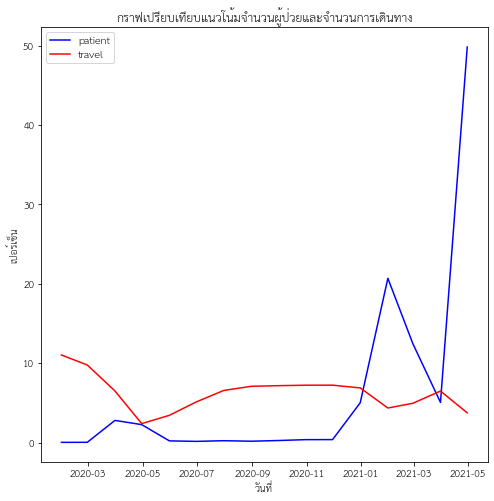

In [215]:
plt.figure(figsize=(8, 8))
plt.plot(df_covid_patients['announce_date'],df_covid_patients['percentage'],'b',label = 'patient')
plt.plot(df_total_travel['date'],df_total_travel['percentage'],'r',label = 'travel')
plt.legend()
plt.xlabel("วันที่")
plt.ylabel("เปอร์เซ็น")
plt.title('กราฟเปรียบเทียบแนวโน้มจำนวนผู้ป่วยและจำนวนการเดินทาง')

จากกราฟพบว่า จำนวนการเดินทางไม่ส่งผลต่อจำนวนผู้ติดเชื้อ และพบว่าเมื่อพบผู้ติดเชื้อการเดินทางจะเริ่มลดลง

###ข้อที่ 2

เปรียบเทียบวิธีการเดินทางของคนเป็นรายเดือนเทียบกับจำนวนผู้ป่วยในเดือนนั้นๆ

In [ ]:
#เรียกดูข้อมูล
print(df_covid_patients.head())
print(df_travel_mode.head())

พบว่าข้อมูลมีความแตกต่างการมากเก็นไปทำการหาเป็นร้อยละ

In [ ]:
#ข้อมูลจำนวนผู้ป่วย
df_covid_patients['percentage'] = df_covid_patients['number_of_patients']/df_covid_patients['number_of_patients'].sum()
df_covid_patients.head()

In [ ]:
#ข้อมูลโหมดการเดินาง
df_travel_mode['percentage_ทางน้ำ'] = df_travel_mode['ทางน้ำ']/df_travel_mode['ทางน้ำ'].sum()
df_travel_mode['percentage_ทางบก'] = df_travel_mode['ทางบก']/df_travel_mode['ทางบก'].sum()
df_travel_mode['percentage_ทางราง'] = df_travel_mode['ทางราง']/df_travel_mode['ทางราง'].sum()
df_travel_mode['percentage_ทางอากาศ'] = df_travel_mode['ทางอากาศ']/df_travel_mode['ทางอากาศ'].sum()
df_travel_mode['percentage_ทางถนน'] = df_travel_mode['ทางถนน']/df_travel_mode['ทางถนน'].sum()
df_travel_mode.head()

สร้างกราฟเปรียบเทียบแนวโน้ม

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(df_covid_patients['announce_date'],df_covid_patients['percentage'],'b',label = 'ผู้ป่วย')
plt.plot(df_travel_mode['date'],df_travel_mode['percentage_ทางน้ำ'],'r',label = 'ทางน้ำ')
plt.plot(df_travel_mode['date'],df_travel_mode['percentage_ทางบก'],'g',label = 'ทางบก')
plt.plot(df_travel_mode['date'],df_travel_mode['percentage_ทางราง'],'c',label = 'ทางราง')
plt.plot(df_travel_mode['date'],df_travel_mode['percentage_ทางอากาศ'],'m',label = 'ทางอากาศ')
plt.plot(df_travel_mode['date'],df_travel_mode['percentage_ทางถนน'],'y',label = 'ทางถนน')
plt.legend()
plt.xlabel("วันที่")
plt.ylabel("เปอร์เซ็น")
plt.title('กราฟเปรียบเทียบแนวโน้มผู้ป่วยและการเดินทางแต่ละแบบ')

จากกราฟพบว่าให้ข้อมูลไม่แตกต่างจากข้อที่ 1 โดยพบว่าการเดินทางจะลดลงเมื่อเริ่มพบผู้ติดเชื้อ

ทำการเปรียบเทียบการเดินทางแต่ละชนิด

###ข้อที่ 3

เปรียบเทียบ จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของจังหวัด top 10 ของ 6 เดือนล่าสุด

เรียกดูข้อมูลรายวัน


In [ ]:
data_covid_prvince_day.head()

ทำการเรียกดูวันที่สุดท้ายด้วยการเรียงข้อมูล

In [ ]:
data_covid_prvince_day.sort_values('announce_date',inplace=True)
data_covid_prvince_day.tail(1)

พบว่าเดือนสุดท้ายคือเดือนเมษายน ดังนั้น ข้อมูล 6 เดือนสุดท้ายที่ใช้ในการนำเสนอคือ พฤศจิกายน-2020, ธันวาคาม-2020, มกราคม-2021, กุมภาพันธ์-2021, มีนาคม-2021 และเมษายน-2021

ทำการดึงข้อมูล 6 เดือน ล่าสุด

In [ ]:
data_covid_prvince_last6M = data_covid_prvince_day[data_covid_prvince_day['announce_date']>= datetime(2020, 11, 1)]
data_covid_prvince_last6M.head()

ตั้งค่า index ใหม่

In [ ]:
data_covid_prvince_last6M.reset_index(drop= True, inplace=True)

ตรวจหาจังหวัดที่บันทึกข้อมูลพลาด และแก้ไข พระนครศรีอยุธยา

In [ ]:
#เรียกดูแถวที่ผิด
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="อยุธยา"]

In [ ]:
#แทนที่ข้อมูลที่ผิดด้วยข้อมูลที่ถูกต้อง
data_covid_prvince_last6M.replace(to_replace = 'อยุธยา', value = 'พระนครศรีอยุธยา', inplace=True)
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="อยุธยา"]

ตรวจหาจังหวัดที่บันทึกข้อมูลพลาด และแก้ไข หนองบัวลำภู

In [ ]:
#เรียกดูแถวที่ผิด
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="หนองบััวลำภู"]

In [ ]:
#แทนที่ข้อมูลที่ผิดด้วยข้อมูลที่ถูกต้อง
data_covid_prvince_last6M.replace(to_replace = 'หนองบััวลำภู', value = 'หนองบัวลำภู', inplace=True)
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="หนองบััวลำภู"]

ตรวจหาจังหวัดที่บันทึกข้อมูลพลาด และแก้ไข อุดรธานี

In [ ]:
#เรียกดูแถวที่ผิด
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="อุุดรธานี"]

In [ ]:
#แทนที่ข้อมูลที่ผิดด้วยข้อมูลที่ถูกต้อง
data_covid_prvince_last6M.replace(to_replace = 'อุุดรธานี', value = 'อุดรธานี', inplace=True)
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="อุุดรธานี"]

In [ ]:
#เรียกดูแถวที่ผิด
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="อุดรธานีี"]

In [ ]:
#แทนที่ข้อมูลที่ผิดด้วยข้อมูลที่ถูกต้อง
data_covid_prvince_last6M.replace(to_replace = 'อุดรธานีี', value = 'อดรธานีี', inplace=True)
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="อุดรธานีี"]

ทำการเรียกดูข้อมูลที่ไม่เกี่ยวข้องแล้วตัดทิ้ง

In [ ]:
#เรียกดูแถวที่ผิด
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="เวียงจันทร์"]

In [ ]:
#ตัดข้อมูลทิ้ง
data_covid_prvince_last6M.drop(36773, inplace=True)
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="เวียงจันทร์"]

In [ ]:
#เรียกดูแถวที่ผิด
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="พม่า"]

In [ ]:
#ตัดข้อมูลทิ้ง
data_covid_prvince_last6M.drop(2108, inplace=True)
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="พม่า"]

In [ ]:
#เรียกดูแถวที่ผิด
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="ไม่ระบุ"]

In [ ]:
#ตัดข้อมูลทิ้ง
data_covid_prvince_last6M.drop(38449, inplace=True)
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="ไม่ระบุ"]

In [ ]:
#ตัดข้อมูลทิ้ง
data_covid_prvince_last6M.drop(38451, inplace=True)
data_covid_prvince_last6M[data_covid_prvince_last6M['province_of_onset']=="ไม่ระบุ"]

ทำการ groupby รวมจังหวัด

In [ ]:
data_covid_prvince_last6M_sum = data_covid_prvince_last6M.groupby('province_of_onset').sum()
data_covid_prvince_last6M_sum.head()

ทำการเก็บจังหวัดจาก index

In [ ]:
data_covid_prvince_last6M_sum['province_of_onset'] =data_covid_prvince_last6M_sum.index
data_covid_prvince_last6M_sum.head()

ทำการปรับค่า index ให้เป็น 0

In [ ]:
data_covid_prvince_last6M_sum.reset_index(drop=True, inplace=True)
data_covid_prvince_last6M_sum.head()

ทำการเรียงข้อมูลจำนวนผู้ป่วย

In [ ]:
data_covid_prvince_last6M_sum.sort_values('number_of_patients',inplace=True,ascending=False)
data_covid_prvince_last6M_sum.reset_index(drop=True, inplace=True)
data_covid_prvince_last6M_sum.head()

ทำการเลือก 10 จังหวัดที่มีผู้ป่วยมากที่สุด





In [ ]:
data_covid_Top_prvince = data_covid_prvince_last6M_sum.iloc[0:10]
data_covid_Top_prvince

สร้างกราฟเปรียบเทียบ

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(data_covid_Top_prvince['province_of_onset'],
        data_covid_Top_prvince['number_of_patients'],
        data = data_covid_Top_prvince)
plt.xlabel('จังหวัด')
plt.ylabel('จำนวนผู้ป่วยที่พบ (คน)')
plt.title('จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของจังหวัด top 10');

จากกราฟระหว่างเดือรชนพฤศจิกายน 2563 ถึง เมษายน 2564 พบว่า จังหวัดสมุทรสาครมีผู้ป่วยมากที่สุด รองลงมาคือ จังหวัดกรุงเทพมหานคร และจังหวัดเชียงมีจำนวนผู้ป่วยมากสุดเป็นอันดับที่ 3

###ข้อที่ 4

เปรียบเทียบจำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค (5 ภูมิภาค (การท่องเที่ยว)) 

เรียกดูข้อมูลผู้ป่วย

In [ ]:
df_covid_prvince.head()

In [ ]:
df_region.head()

ทำการกำหนดภูมิภาคให้แต่จังหวัด

In [ ]:
region = list()
for i in df_covid_prvince.iterrows():
  for j in df_region.iterrows():
    if i[1]['province_of_onset'] == j[1]['province']:
       region.append(j[1]['region'])
df_covid_prvince['region'] = region
df_covid_prvince.head()

ใช้ .map ช่วยได้
 

In [ ]:
df_covid_prvince['region'] = df_region['province'].map(df_region.set_index('province')['region'])
df_covid_prvince.head()

groupby นับผู้ป่วยแต่ละภูมิภาค

In [ ]:
df_region_of_patient = df_covid_prvince.groupby('region').sum()
df_region_of_patient

สร้างคอลัมน์เก็บ index

In [ ]:
df_region_of_patient['region'] = df_region_of_patient.index
df_region_of_patient.head()

ทำการตั้งค่า index ใหม่

In [ ]:
df_region_of_patient.reset_index(drop=True, inplace=True)
df_region_of_patient.head()

ทำการเรียงข้อมูล

In [ ]:
df_region_of_patient.sort_values('number_of_patients', ascending=False, inplace=True)
df_region_of_patient.head()

สร้างกราฟแท่งเปรียบเทียบ

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(df_region_of_patient['region'],
        df_region_of_patient['number_of_patients'],
        data = df_region_of_patient)
plt.xlabel('ภูมิภาค')
plt.ylabel('จำนวนผู้ป่วยที่พบ (คน)')
plt.title('จำนวนผู้ป่วยที่ตรวจพบเชื้อ covid-19 ของแต่ละภูมิภาค(การท่องเที่ยว)')

จากราฟพบว่า ภาคกลางมีพื้นที่ภูมิป่วยมากที่สุด รองลงมาคือ ภาคตะวันออก และภาคเหนือมีการพบผู้ป่วยเป็นอันดับที่สาม

##ส่วนที่ 2

In [ ]:
df_region_of_patient.to_excel(r'/content/gdrive/MyDrive/Data_Viz/Final/df_region_of_patient.xlsx',index=False, header=True)
df_covid_patients.to_excel(r'/content/gdrive/MyDrive/Data_Viz/Final/df_covid_patients.xlsx',index=False, header=True)
df_covid_prvince.to_excel(r'/content/gdrive/MyDrive/Data_Viz/Final/df_covid_prvince.xlsx',index=False, header=True)
df_total_travel.to_excel(r'/content/gdrive/MyDrive/Data_Viz/Final/df_total_travel.xlsx',index=False, header=True)
df_travel_type.to_excel(r'/content/gdrive/MyDrive/Data_Viz/Final/df_travel_type.xlsx',index=False, header=True)
df_travel_mode.to_excel(r'/content/gdrive/MyDrive/Data_Viz/Final/df_travel_mode.xlsx',index=False, header=True)

ข้อมูล: https://drive.google.com/drive/folders/1tJyy_CPY_s7SX92HRcbJdLp8KpOeRMB0?usp=sharing

Dashboard  : https://datastudio.google.com/reporting/e15b4509-366e-4f66-bdfe-c506aa8db8e8/page/XR2GC

Youtube : https://youtu.be/jZp2vT_d7q8